# Random walks with absorbing barriers

Random walk with absorbing barriers at $z=1$ and $z=n$

Let

$$
P(Z_{n+1} = z + 1 / Z_n = z) = p
$$

$$
P(Z_{n+1} = z - 1 / Z_n = z) = 1 - p = q
$$

At each step n, $Z_{n+1}$ is equal to $Z_{n} + 1$ or $Z_n - 1$

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
plt.style.use('science')
import numpy as np
from numpy.random import rand
import matplotlib as mpl

### One dimensional random walk

In [3]:
# x is the starting point and he walker advance with a probability of prob
def next_step(x, prob):
    if (rand() < prob):
        return x + 1
    else:
        return x - 1

In [4]:
# Random walk on the real line with absorbing barriers 1 and N
# k is the starting point of the random walker
def walk_1d(k = 50, prob = 0.5, N = 100, imax = 1000):
    steps = np.array([k])
    for i in range(imax):
        x = steps[-1]
        if x == 1 or x == N:
            break
        steps = np.append(steps, next_step(x, prob))
    return steps

In [5]:
walker_color = ["black", "red", "grey"]

In [6]:
def plot_walk_1d(num_walkers = 1, start = 25, prob = 0.5, N = 50, **args):
    fig = plt.figure(figsize=(5, 3.5))
    for i in range(num_walkers):
        w = walk_1d(start, prob = prob, N = N, **args)
        plt.plot(w, color = walker_color[i])
    plt.show()

**Random walker in 1d**

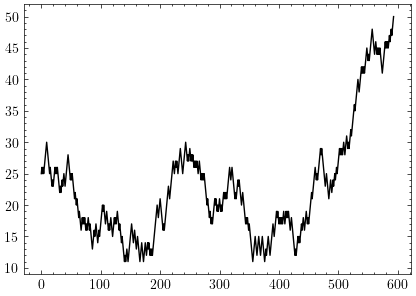

In [7]:
plot_walk_1d(1)

**2 random walkers**

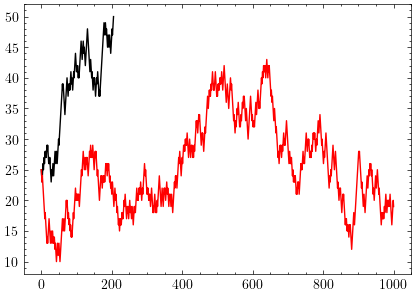

In [8]:
plot_walk_1d(2)

**3 random walkers**

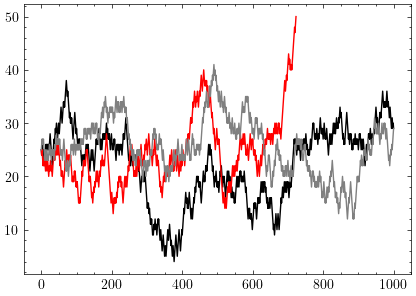

In [9]:
plot_walk_1d(3)

**3 random walkers that converge to zero**

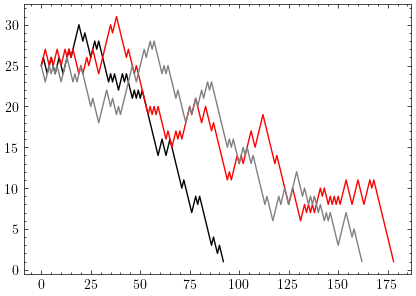

In [10]:
plot_walk_1d(3, prob=0.4)

### Two dimensional random walk

In [11]:
def next_step_2d(xa, xb, prob):
    da = [0,  0, -1, 1]
    db = [-1, 1,  0,  0]
    index = np.random.choice(4, p = prob)
    return np.array([xa + da[index], xb + db[index]])

In [12]:
# (a,b) is the starting point of the random walker
def walk_2d(a, b, prob = np.repeat(0.25, 4), N = 10, imax = 1000):
    steps = np.array([[a, b]])
    for i in range(imax):
        x = steps[-1].flatten()
        xa, xb = x
        if xa == 1 or xa == N or xb == 1 or xb == N:
            break
        steps = np.vstack((steps, next_step_2d(xa, xb, prob)))
    return steps

In [13]:
def plot_walk_2d(num_walkers = 1, start = (100, 100), N = 200, **args):
    figure = plt.figure(figsize=(5, 5))
    for i in range(num_walkers):
        w = walk_2d(start[0], start[1], N = N, **args)
        plt.plot(w[:, 0], w[:, 1], color=walker_color[i])
    plt.show()

**Random walker in 2d**

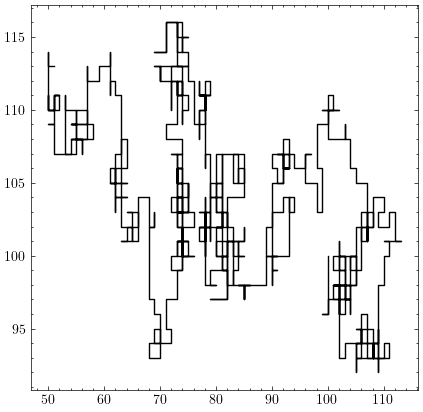

In [14]:
plot_walk_2d()

**2 random walkers in 2d**

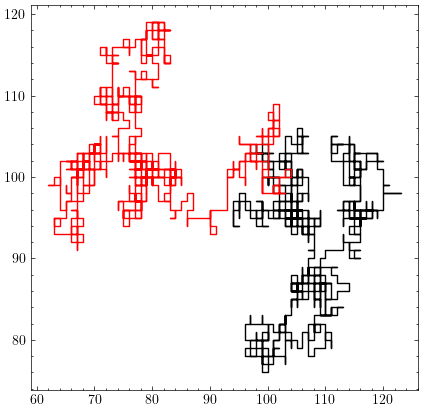

In [15]:
plot_walk_2d(2)

**3 random walkers in 2d**

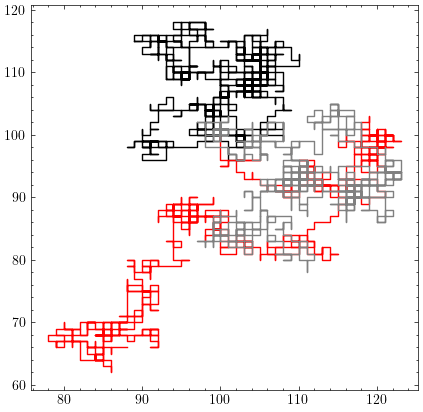

In [16]:
plot_walk_2d(3)

### Three dimensional random walk

In [17]:
def next_step_3d(xa, xb, xc, prob):
    da = [0,  0, -1, 1, 0,  0]
    db = [0,  0,  0, 0, 1, -1]
    dc = [1, -1,  0, 0, 0,  0]
    index = np.random.choice(6, p = prob)
    return np.array([xa + da[index], xb + db[index], xc + dc[index]])

In [18]:
# Random walk with absorbing barriers 1 and N
def walk_3d(a, b, c, prob = np.repeat(1/6, 6), N = 10, imax = 1000):
    steps = np.array([[a, b, c]])
    for i in range(imax):
        x = steps[-1].flatten()
        xa, xb, xc = x
        if xa == 1 or xa == N or xb == 1 or xb == N or xc == 1 or xc == N:
            break
        steps = np.vstack((steps, next_step_3d(xa, xb, xc, prob)))
    return steps

In [19]:
def plot_walk_3d(num_walkers = 1, start = (100, 100, 100), N = 200, **args):
    figure = plt.figure(figsize=(5, 5))
    ax = plt.axes(projection = "3d")
    for i in range(num_walkers):
        w = walk_3d(start[0], start[1], start[2], N = N, **args)
        ax.plot3D(w[:,0], w[:,1], w[:,2], color = walker_color[i])
    plt.show()

**Random walker in 3d**

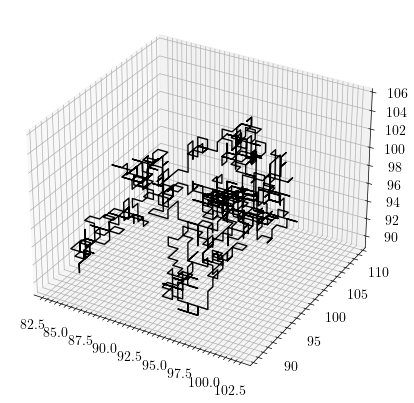

In [20]:
plot_walk_3d()

**Two random walkers in 3d**

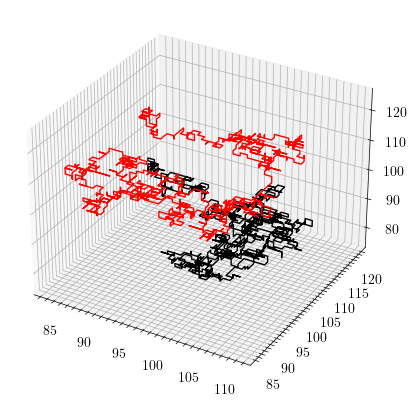

In [21]:
plot_walk_3d(2)

**Three random walkers in 3d**

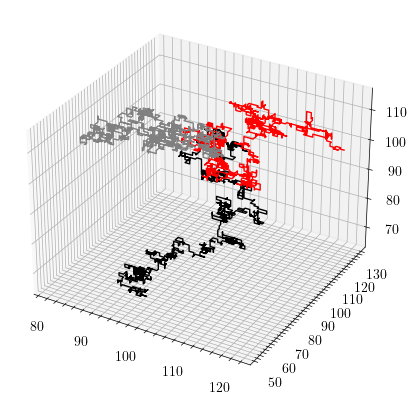

In [22]:
plot_walk_3d(3)